In [3]:
from autoencoder import trainer as ae_trainer, tester as ae_tester
from autoencoder.model import ConditionalAutoEncoder as CAE
from variational_autoencoder import trainer as vae_trainer, tester as vae_tester
# from variational_autoencoder.variational_autoencoder import ConditionalVariationalAutoEncoder as CVAE
from variational_autoencoder.model import ConditionalVariationalAutoEncoder as CVAE
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
    print('device is mps')
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print('device is cuda')
else:
    device = torch.device('cpu')
    print('device is cpu')


device is mps


0-0	batch loss:	 1.0345127582550049
0-100	batch loss:	 0.5340955257415771
0-200	batch loss:	 0.4580078423023224
0-300	batch loss:	 0.42670026421546936
0-400	batch loss:	 0.4335167407989502
0-500	batch loss:	 0.3807636797428131
0-600	batch loss:	 0.40721720457077026
0-700	batch loss:	 0.3828260004520416
0-800	batch loss:	 0.3731507956981659
0-900	batch loss:	 0.4099889099597931
Epoch 0 loss: 0.4497
1-0	batch loss:	 0.3868420124053955
1-100	batch loss:	 0.42797422409057617
1-200	batch loss:	 0.3564404845237732
1-300	batch loss:	 0.4030361771583557
1-400	batch loss:	 0.3818812370300293
1-500	batch loss:	 0.33730340003967285
1-600	batch loss:	 0.36989864706993103
1-700	batch loss:	 0.36971014738082886
1-800	batch loss:	 0.34573230147361755
1-900	batch loss:	 0.3758401572704315
Epoch 1 loss: 0.3788
2-0	batch loss:	 0.3682425320148468
2-100	batch loss:	 0.409032940864563
2-200	batch loss:	 0.378745436668396
2-300	batch loss:	 0.3700166344642639
2-400	batch loss:	 0.38504478335380554
2-500	ba

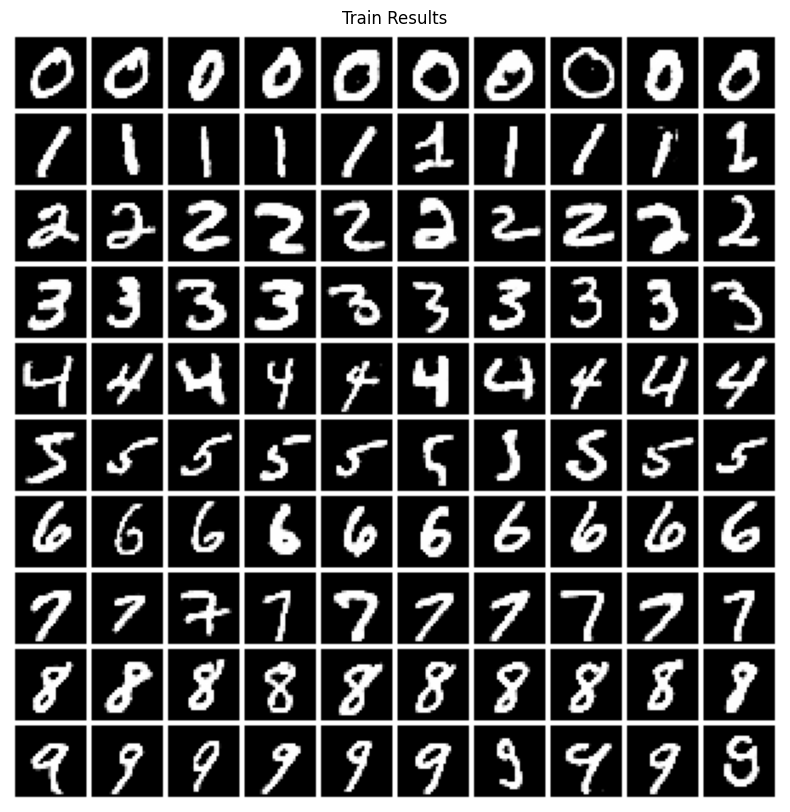

model saved to ./autoencoder_model.pth


In [4]:

# DOWNLOAD THE DATASET TO THE GIVEN DATA DIRECTORY BEFORE RUNNING FOLLOWING SCRIPTS

# You may add or remove parameters from the trainer function, but don't change the data directory,
# and the model save path
ae_trainer.train(CAE(device), '../data', 25, './autoencoder_model.pth', 10)


Test infer shape: torch.Size([100, 1, 28, 28]), range: [0.000, 1.000]


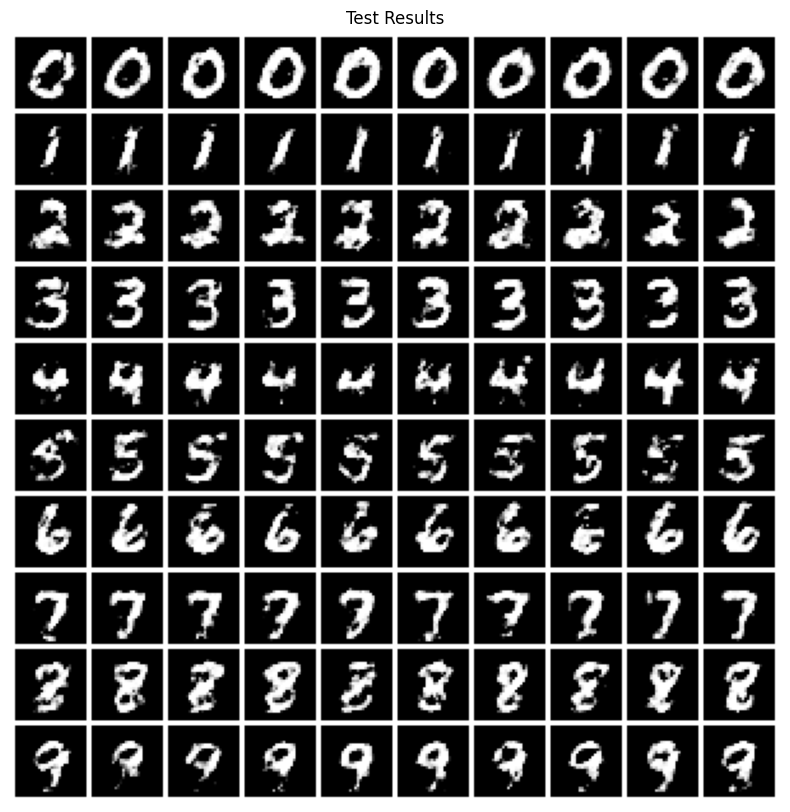

In [6]:

cae_model = CAE.load('./autoencoder_model.pth', device)

# DON'T CHANGE THIS PART
ae_tester.test(cae_model)


Tester uses the infer method with the default parameters

The infer method I implemented uses a parameter beta, which determines how different we want to generate our images from the sample mean.

The default beta parameter used to multiply the std_dev of class labels is 0.4, which is relatively low.

This is why the results above look somewhat decent, yet not exactly the same as each other.

A test method with different beta parameters is demonstrated as an extra test in the bottom, which shows how this parameter affects the generated example quality.

0-0	batch loss:	 0.9364672899246216
0-100	batch loss:	 0.25218844413757324
0-200	batch loss:	 0.23230187594890594
0-300	batch loss:	 0.21419155597686768
0-400	batch loss:	 0.19440416991710663
0-500	batch loss:	 0.16323406994342804
0-600	batch loss:	 0.17241474986076355
0-700	batch loss:	 0.16147764027118683
0-800	batch loss:	 0.1781284660100937
0-900	batch loss:	 0.1737634688615799
Epoch 0 loss: 0.2038
1-0	batch loss:	 0.17551371455192566
1-100	batch loss:	 0.16747353971004486
1-200	batch loss:	 0.16475500166416168
1-300	batch loss:	 0.1584267020225525
1-400	batch loss:	 0.17129448056221008
1-500	batch loss:	 0.17011582851409912
1-600	batch loss:	 0.14660197496414185
1-700	batch loss:	 0.15267522633075714
1-800	batch loss:	 0.14933764934539795
1-900	batch loss:	 0.15783508121967316
Epoch 1 loss: 0.1592
2-0	batch loss:	 0.15197889506816864
2-100	batch loss:	 0.1382436752319336
2-200	batch loss:	 0.14253658056259155
2-300	batch loss:	 0.1367388665676117
2-400	batch loss:	 0.1422248482704

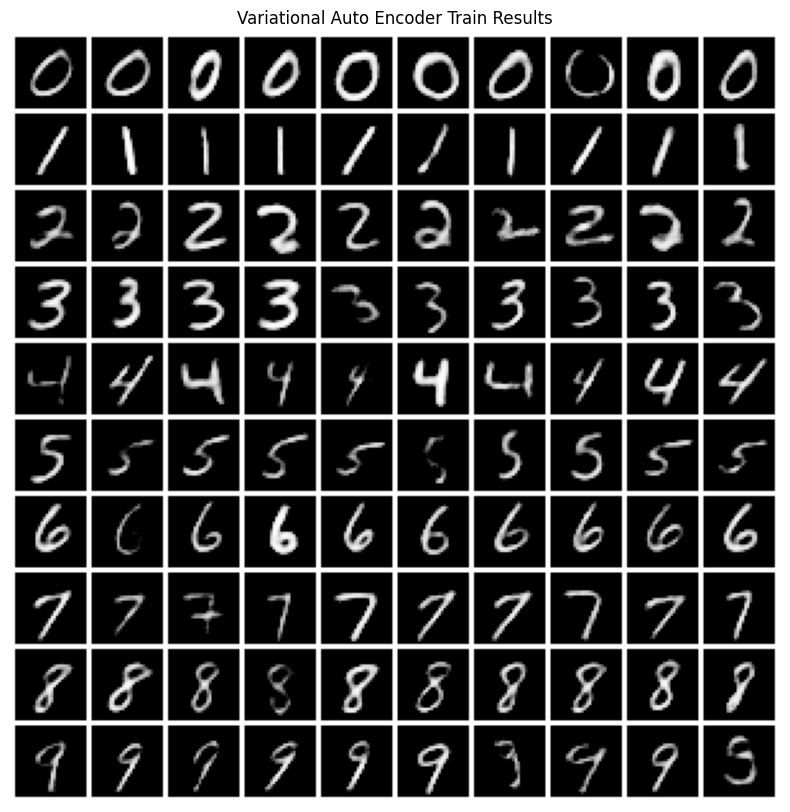

model saved to ./variational_autoencoder_model.pth


In [8]:
# You may add or remove parameters from the trainer function, but don't change the data directory,
# and the model save path
vae_trainer.train(CVAE(device), '../data', 20, './variational_autoencoder_model.pth', 5, kl_beta=0.00005)


The results with default inference parameters for our training samples reconstruction is above.

The digits look blurry because VAE produces normally distributed latent vectors across classes. This creates a soft boundary between samples in the latent space.

Reconstructed training samples don't look as good as the standard autoencoder we ran above. We will see how it performs on generating new examples.

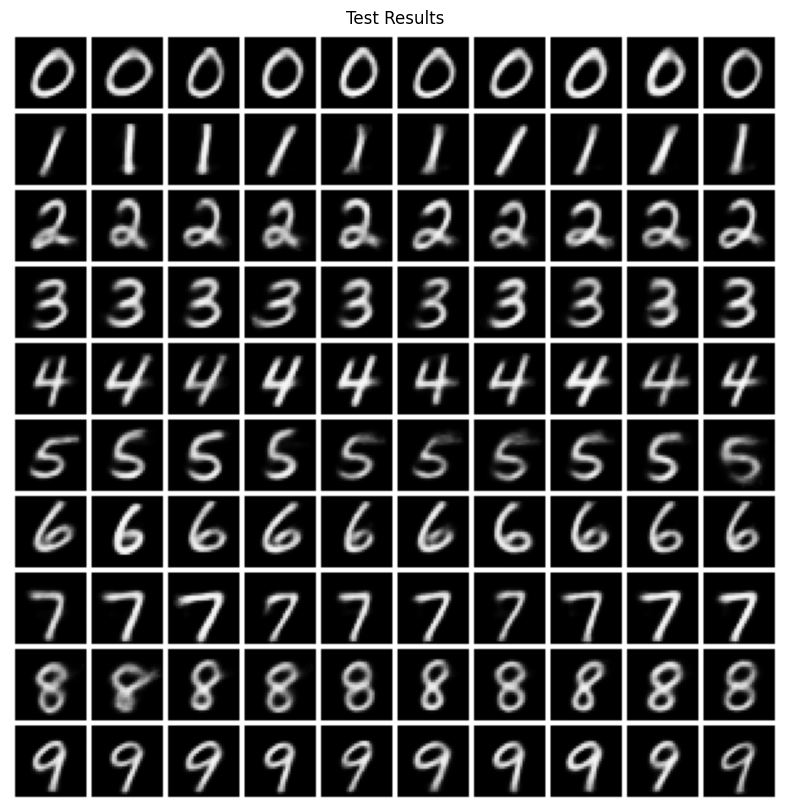

In [9]:
cvae_model = CVAE.load('./variational_autoencoder_model.pth', device)

# DON'T CHANGE THIS PART
vae_tester.test(cvae_model)


In [3]:
# Your trainer and tester functions should generate and show 10x10 digit image grid
# Your trainer functions should output the training logs
# You may add additional parts as you wish

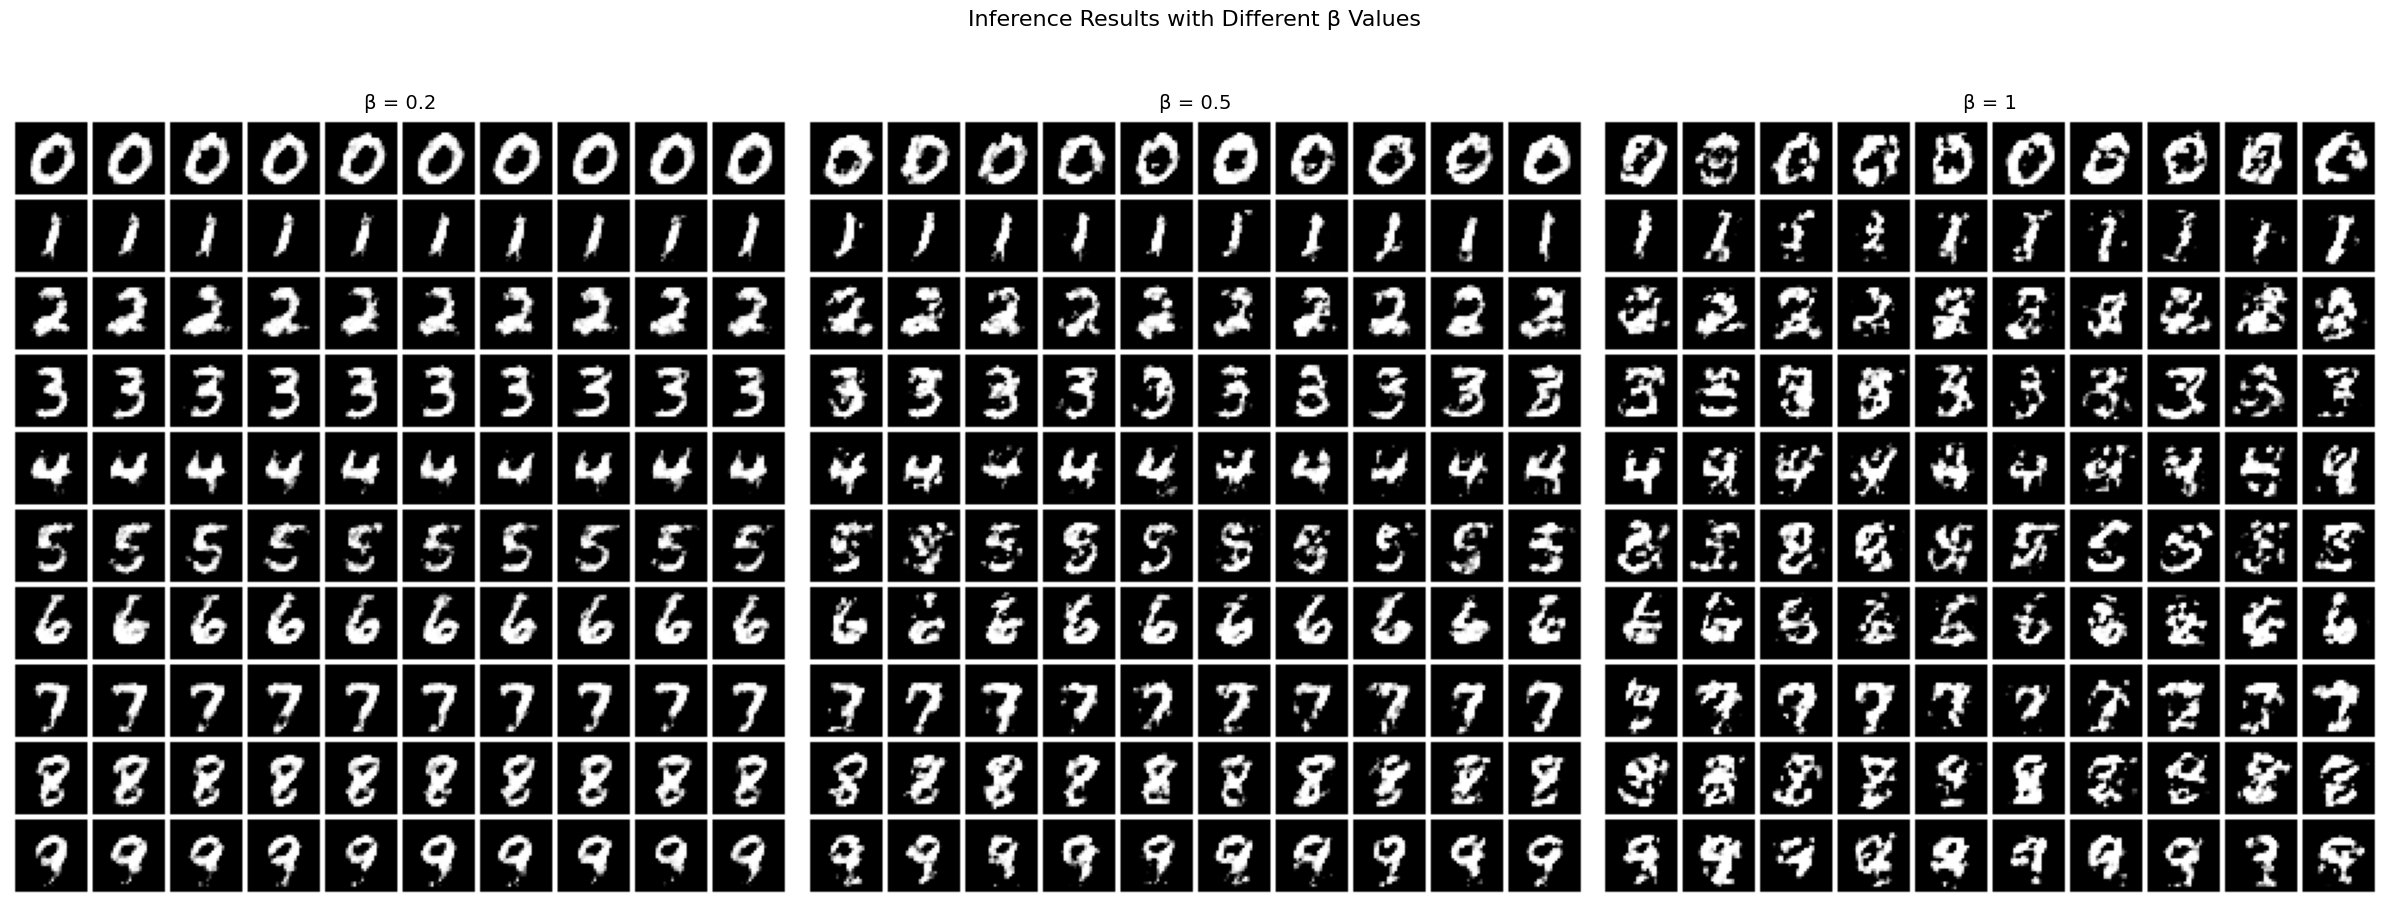

In [10]:
ae_tester.test_with_betas(cae_model, betas=[0.2, 0.5, 1])


`ae_tester.test_with_betas` expects an array of betas for the input and does this:

- Uses the latent_stats from the model (which I have added and is calculated from a subsample of the training set)
- Then generates new images using the parameters mu, sigma and beta to randomly choose latent vectors.
    - new_z = mu + beta * eps * std, where eps ~ N(0,1)
-  By reconstructing this latent vector with the decoder, we reach elements outside of our training set.
- However, since the latent vectors in the conditional auto encoders are sparse, as we increase the parameter beta, the results become poor quickly.

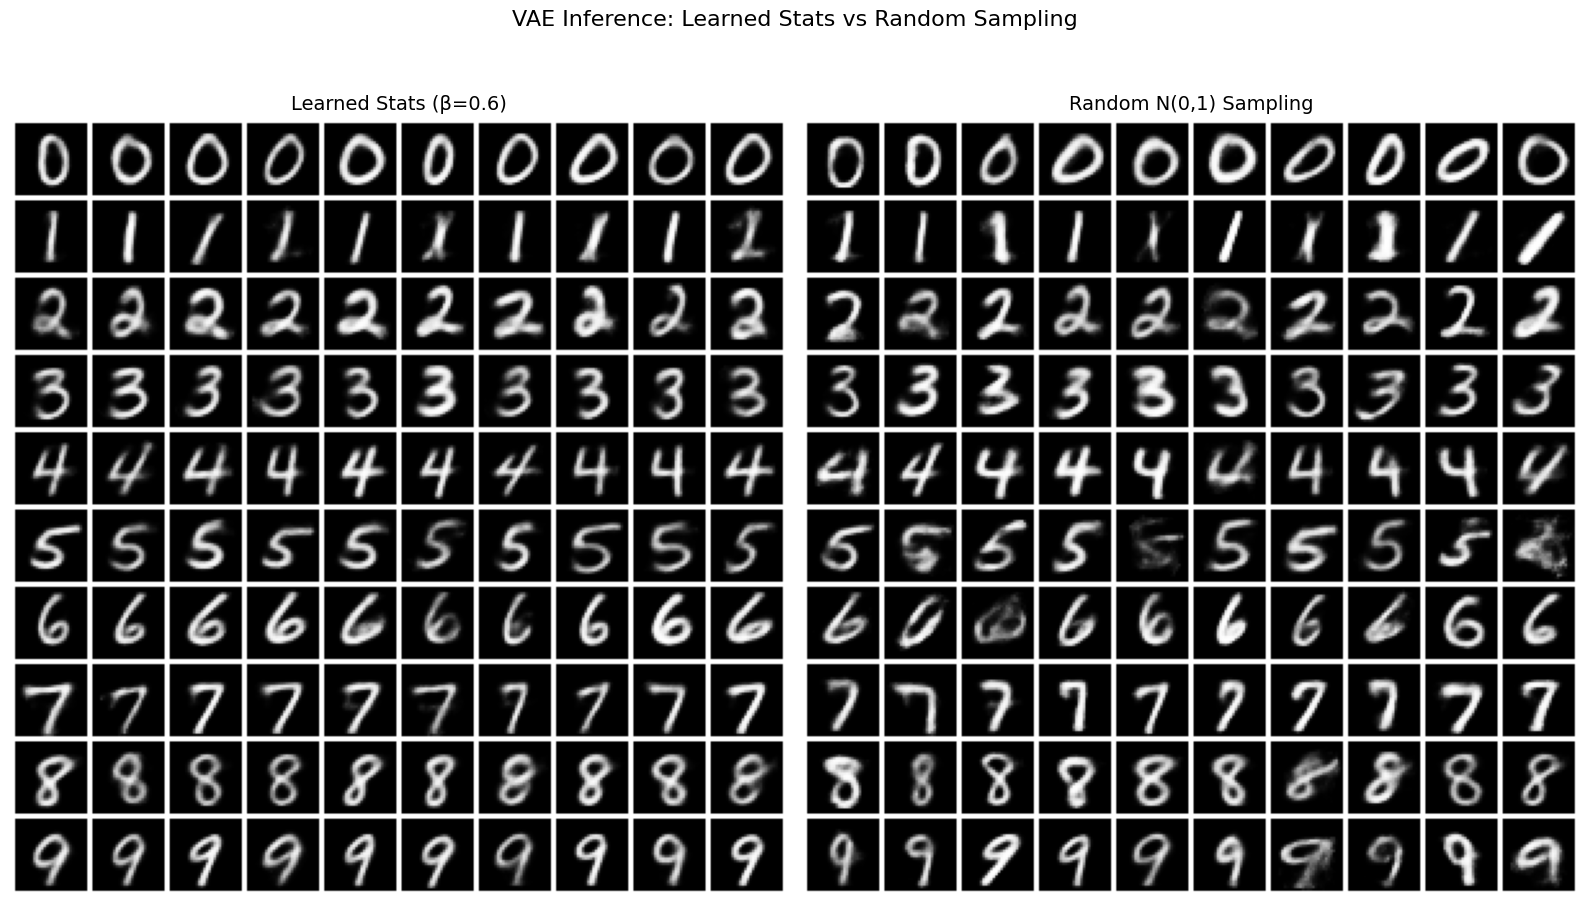

In [11]:
# Try choosing the class vector from the training set, calculated as the mean of a sub-sample during training
vae_tester.test_compare_modes(cvae_model, beta=0.6)

The figure above shows how conditioning the class examples using the latent means and std. deviations affect the model performance. By making educated guesses on the relative position of our examples using the training data, we achieve more standardized results and low variation across examples.